# CodSoft

## Task 1: MOVIE RATING PREDICTION WITH PYTHON
### Objective:-
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.      
**Dataset:-** https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

## Loading necessay Libraries and Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.nn as nn
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the movie dataset into a pandas DataFrame
data = pd.read_csv('/Users/asaifali/Desktop/Internships/Codsoft/IMDb Movies India.csv', encoding='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [3]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
data.drop(["Name"], axis=1, inplace=True)
data.drop(['Director'], axis=1, inplace=True)
data.drop(['Actor 1'], axis=1, inplace=True)
data.drop(['Actor 2'], axis=1, inplace=True)
data.drop(['Actor 3'], axis=1, inplace=True)


In [5]:
data

,Year,Duration,Genre,Rating,Votes
0,NaN,NaN,Drama,NaN,NaN
1,(2019),109 min,Drama,7.0,8
2,(2021),90 min,"Drama, Musical",NaN,NaN
3,(2019),110 min,"Comedy, Romance",4.4,35
4,(2010),105 min,Drama,NaN,NaN
...,...,...,...,...,...
15504,(1988),NaN,Action,4.6,11
15505,(1999),129 min,"Action, Drama",4.5,655
15506,(2005),NaN,Action,NaN,NaN
15507,(1988),NaN,Action,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  object 
 1   Duration  7240 non-null   object 
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
dtypes: float64(1), object(4)
memory usage: 605.9+ KB


In [7]:
#Data Cleaning
data['Year']=data['Year'].fillna(data['Year'].mode()[0])
data['Duration']=data['Duration'].fillna(data['Duration'].mode()[0])
data['Genre']=data['Genre'].fillna(data['Genre'].mode()[0])
data['Votes']=data['Votes'].fillna(data['Votes'].mode()[0])
data['Rating']=data['Rating'].fillna(data['Rating'].mode()[0])
data.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
dtype: int64

In [8]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical column
data['Year'] = le.fit_transform(data['Year'])
data['Duration'] = le.fit_transform(data['Duration'])
data['Genre'] = le.fit_transform(data['Genre'])
data['Votes'] = le.fit_transform(data['Votes'])
print(data.head())

   Year  Duration  Genre  Rating  Votes
0    98        20    299     6.2   1849
1    98         9    299     7.0   1849
2   100       172    351     6.2   1849
3    98        10    228     4.4   1169
4    89         5    299     6.2   1849


In [9]:
# Preprocess your data, select relevant features, and the target variable (movie rating)
X = data[['Year', 'Duration', 'Genre','Votes']]  # Features
y = data['Rating']  # Target variable

In [10]:
# Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualisation

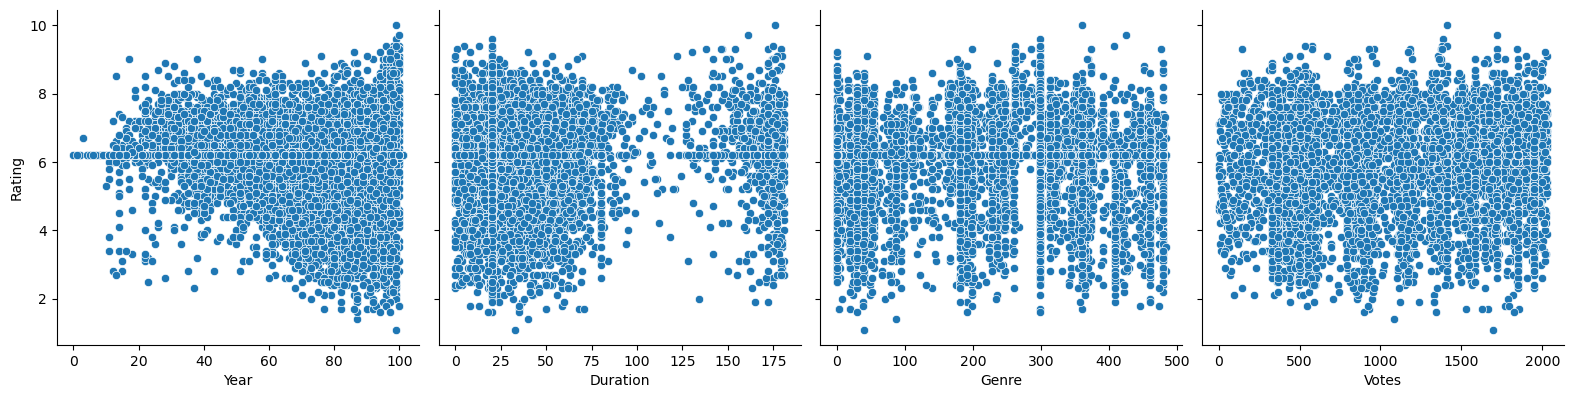

In [11]:
sns.pairplot(data, x_vars=['Year', 'Duration', 'Genre','Votes'], y_vars='Rating', height=4, aspect=1, kind='scatter')
plt.show()

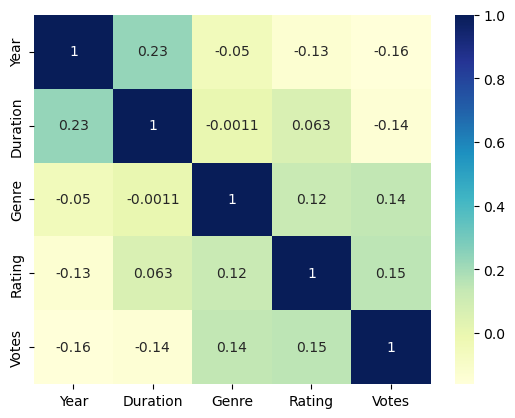

In [12]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### **feature importance graph:** A feature importance graph displays the relative significance of different features in predicting the target variable. It aids in identifying the most influential features for the model's predictions, facilitating effective feature selection and enhancing understanding of the underlying data patterns.

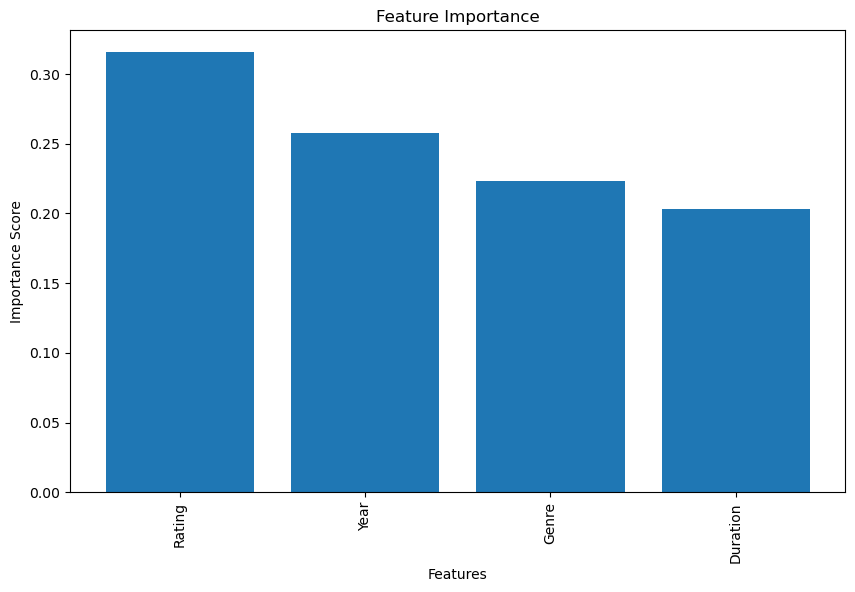

In [13]:
# Load the features   
feature_names = data.columns

# Train a RandomForestRegressor 
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


## Comparision of Models:

### **Decision Tree Regression:** Constructs a decision tree to model the data and predict outcomes based on a sequence of binary decisions.

In [14]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor()
# Fit the regressor on the training data
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [15]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )


Root Mean Squared Error: 1.2295191302376052
R2 Score= -0.5073899200940051


### **Random Forest Regression:** Averages predictions from multiple decision trees to enhance accuracy and decrease overfitting.

In [16]:
# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # or RandomForestClassifier

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
# Make predictions on the test data
predictions = model.predict(X_test)


# Calculate the mean squared error
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, predictions)))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9140924263213529
R2 Score= -0.5073899200940051


### **Support Vector Regression (SVR):** Utilizes support vector machines to perform regression tasks, enabling the handling of complex decision boundaries and non-linear data.

In [43]:
# Initialize the Support Vector Regressor
regressor = SVR(kernel='linear')

# Fit the regressor on the training data
regressor.fit(X_train, y_train)


SVR(kernel='linear')

In [44]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Mean Squared Error: 0.9865656417897377
R2 Score= 0.02947436145581872


### **Linear Regression:** A fundamental model that assumes a linear relationship between the input features and the target variable.

In [18]:
# Create a linear regression model and fit it on the training data
model = LinearRegression()

# Fit the regressor on the training data
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9678336281051961
R2 Score= 0.06597942764108733


### **CatBoost Regressor:** An implementation of gradient boosting that is optimized for categorical features and provides high accuracy and fast training.

In [20]:
# Create a Catboost regression model and fit it on the training data
model = CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE')

# Fit the regressor on the training data
model.fit(X_train, y_train, verbose=False)

In [21]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.8881114470552481
R2 Score= 0.21351587356613744


### **AdaBoost Regressor:** A boosting algorithm that combines multiple weak learners to create a strong predictive model, giving more weight to misclassified data points.

In [22]:
# Create a Adaboost regression model and fit it on the training data
model = AdaBoostRegressor(n_estimators=100, random_state=42)
# Fit the regressor on the training data
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [23]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9443911765835746
R2 Score= 0.11067834456137116


### **XGBoost Regressor:** An optimized gradient boosting library that is highly efficient and scalable, providing high prediction accuracy and handling complex datasets effectively.

In [24]:
# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the XGBoost regressor
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# Train the XGBoost regressor
model = xgb.train(params, dtrain, num_boost_round=100)

In [25]:
# Make predictions on the test data
y_pred = model.predict(dtest)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.8716236493376104
R2 Score= 0.2424469752992865


### **Ridge Regression:** A regression technique that incorporates L2 regularization to prevent overfitting by penalizing large coefficient values.

In [26]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model on the training data
ridge_model.fit(X_train, y_train)


Ridge()

In [27]:
# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9678336287266276
R2 Score= 0.0659794264416459


### **Lasso Regression:** Similar to Ridge Regression, it utilizes L1 regularization, encouraging sparsity in the coefficient values and performing feature selection.

In [28]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

Lasso()

In [29]:
# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9713060637107073
R2 Score= 0.059265165042668655


### **Gradient Boosting Regression:** Builds an ensemble of weak learners, typically decision trees, in a sequential manner to create a powerful predictive model.

In [30]:
# Initialize the Gradient Boosting Regression model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.8714473574099882
R2 Score= 0.24275338501487032


### **Polynomial Regression:** Extends linear regression by incorporating polynomial terms, allowing for the capture of non-linear relationships between variables.

In [32]:
# Transform the data to include another axis
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

In [34]:
# Make predictions
y_pred = poly_model.predict(X_poly)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9291672256319
R2 Score= 0.14254484803786704


### **Elastic Net Regression:** A hybrid of Ridge and Lasso Regression, combining L1 and L2 regularization to balance their properties.

In [35]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters as needed

# Fit the model on the training data
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [36]:
# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 0.9684409956082906
R2 Score= 0.06480676380710515


### **Neural Network Regression:** Utilizes deep learning techniques to capture complex relationships in the data, facilitating the analysis of intricate patterns.

In [37]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.values.astype(np.float32))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Create a custom neural network class
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


In [39]:
# Initialize the model
input_size = X.shape[1]
model = NeuralNet(input_size)

In [40]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [41]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12407])) that is different to the input size (torch.Size([12407, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/500], Loss: 33.9458
Epoch [20/500], Loss: 29.0811
Epoch [30/500], Loss: 22.9430
Epoch [40/500], Loss: 15.7972
Epoch [50/500], Loss: 8.8652
Epoch [60/500], Loss: 3.9978
Epoch [70/500], Loss: 2.2704
Epoch [80/500], Loss: 2.1652
Epoch [90/500], Loss: 1.9683
Epoch [100/500], Loss: 1.8320
Epoch [110/500], Loss: 1.7965
Epoch [120/500], Loss: 1.7597
Epoch [130/500], Loss: 1.7247
Epoch [140/500], Loss: 1.6935
Epoch [150/500], Loss: 1.6623
Epoch [160/500], Loss: 1.6321
Epoch [170/500], Loss: 1.6026
Epoch [180/500], Loss: 1.5736
Epoch [190/500], Loss: 1.5451
Epoch [200/500], Loss: 1.5168
Epoch [210/500], Loss: 1.4887
Epoch [220/500], Loss: 1.4608
Epoch [230/500], Loss: 1.4329
Epoch [240/500], Loss: 1.4053
Epoch [250/500], Loss: 1.3778
Epoch [260/500], Loss: 1.3505
Epoch [270/500], Loss: 1.3237
Epoch [280/500], Loss: 1.2972
Epoch [290/500], Loss: 1.2713
Epoch [300/500], Loss: 1.2461
Epoch [310/500], Loss: 1.2218
Epoch [320/500], Loss: 1.1985
Epoch [330/500], Loss: 1.1765
Epoch [340/500]

In [42]:
# Make predictions on the test data
with torch.no_grad():
    y_pred = model(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", rmse)

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

Root Mean Squared Error: 1.013927
R2 Score= -0.025105100204551922


### **Conclusion:-** We can see that Gradient Boosting Regression model is the best model and Desicion Tree Regressor is the worst model.